In [108]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')  # Estilo del gráfico
import matplotlib.pyplot as plt
from copy import deepcopy
from unidecode import unidecode

import nltk
from nltk.corpus import stopwords

In [109]:
data = pd.read_csv('../data/ENCUESTA GRUPO EMPRESARIAL (Respuestas) - Respuestas de formulario 1.csv',  encoding='utf-8')
print(f'THe shape of data: {data.shape}')

THe shape of data: (101, 17)


In [110]:
data.columns

Index(['Marca temporal',
       '1. ¿Está dispuesto a tomar cursos de educación en linea?, (1 es poco probable y 5 es muy probable)',
       '2.  Seleccione una o más areas del conocimiento que está interesado',
       '3. Si seleccionó otra, especifique cúal',
       '4. ¿En qué red social confía más, a la hora de recibir publicidad y promociones de productos educativos?  Seleccione varias si lo considera.',
       '5. ¿Cuánto sería el valor máximo que está dispuesto a pagar por una licencia mensual? (Acceso ilimitado a todos los cursos)',
       '6. ¿Cuánto estaría dispuesto a pagar por una licencia anual? (Misma condición anterior)',
       '7. ¿De haber tomado alguno de nuestros cursos, que tan interesad@ está en seguir capacitándose con nosotros? (Donde 1 es poco y 5 es muy interesado)',
       '8.  ¿Cuál es la probabilidad de que recomiende nuestra empresa a amigos o familiares?',
       '9.  ¿De tener experiencia tomando alguno de nuestros cursos qué le cambiaría, a la plataform

In [111]:
# Rename features for coding eassy 

data.drop(['Marca temporal', 'Dirección de correo electrónico', '12. Celular o correo electrónico. '], axis =1 , inplace = True) # drop variables useless

data = data.rename(columns = {
    '1. ¿Está dispuesto a tomar cursos de educación en linea?, (1 es poco probable y 5 es muy probable)':'1.dispuesto a tomar cursos online',
    '2.  Seleccione una o más areas del conocimiento que está interesado': '2. areas del conocimiento interesado',
    '3. Si seleccionó otra, especifique cúal': '3. otras areas del conocimiento',
    '4. ¿En qué red social confía más, a la hora de recibir publicidad y promociones de productos educativos?  Seleccione varias si lo considera.': '4. red social confía más',
    '5. ¿Cuánto sería el valor máximo que está dispuesto a pagar por una licencia mensual? (Acceso ilimitado a todos los cursos)': '5. pago máximo mes',
    '6. ¿Cuánto estaría dispuesto a pagar por una licencia anual? (Misma condición anterior)':'6. pago máximo año',
    '7. ¿De haber tomado alguno de nuestros cursos, que tan interesad@ está en seguir capacitándose con nosotros? (Donde 1 es poco y 5 es muy interesado)': '7. interes de contuniar efpe',
    '8.  ¿Cuál es la probabilidad de que recomiende nuestra empresa a amigos o familiares?': '8. probabilidad recomendacion',
    '9.  ¿De tener experiencia tomando alguno de nuestros cursos qué le cambiaría, a la plataforma o a las clases?': 'que cambiaria a la plataforma',
    '10. ¿En qué nivel educativo se encuentra?': '10. nivel educativo',
    '13. Edad': 'edad',
    '12. Celular o correo electrónico. ': '12. contacto',
    '14. Ciudad':'ciudad',
    '15. Género': 'genero'
    })

data.head(2)

,1.dispuesto a tomar cursos online,2. areas del conocimiento interesado,3. otras areas del conocimiento,4. red social confía más,5. pago máximo mes,6. pago máximo año,7. interes de contuniar efpe,8. probabilidad recomendacion,que cambiaria a la plataforma,10. nivel educativo,11. Nombre,edad,ciudad,genero
0,5,"Ciencias políticas, Contratación Estatal, Fina...",NaN,"Facebook, Instagram, WhatsApp",Entre 100 y 200 mil pesos,Entre 500 Y 600,4.0,Alta,No,Profesional,Juan Eslava,28,Yopal,Masculino
1,5,"Administración pública, Finanzas",NaN,Facebook,Entre 100 y 200 mil pesos,Entre 500 Y 600,NaN,Alta,NaN,Profesional,Siomara Andrea Aguilar,26,Aguazul,Femenino


## Analisis descriptivo

In [112]:
data[['edad','1.dispuesto a tomar cursos online',
      '7. interes de contuniar efpe'    
      ]].describe()

,edad,1.dispuesto a tomar cursos online,7. interes de contuniar efpe
count,101.000000,101.000000,84.000000
mean,32.970297,4.099010,3.916667
std,12.056911,1.153299,1.194448
min,17.000000,1.000000,1.000000
25%,25.000000,4.000000,3.000000
50%,29.000000,4.000000,4.000000
75%,35.000000,5.000000,5.000000
max,68.000000,5.000000,5.000000


En la Tabla se destacan varios aspectos significativos. En primer lugar, la edad promedio de los participantes es de 32.9 años, con una mediana de 29 años. Esto sugiere una distribución que tiende hacia una población joven-adulta. La desviación estándar de 12.05 refleja una dispersión moderada alrededor de la media. El rango de edades abarca desde un mínimo de 17 años hasta un máximo de 68 años, abarcando una amplia gama de generaciones.

En lo que respecta al interés en tomar cursos en línea, observamos que la media de satisfacción es de 4.09, con una mediana de 4. La pequeña desviación estándar de 1.15 indica que la mayoría de los participantes expresaron niveles similares de interés, mientras que el rango de respuestas oscila entre 1 y 5. Esto sugiere que la mayoría de los encuestados tienen un interés positivo en la educación en línea.

En relación con el interés en continuar con EFPE (Educación para el Futuro y el Empleo), se evidencia una media de 3.91 y una mediana de 4. Al igual que en el caso anterior, la desviación estándar de 1.19 indica una dispersión moderada de las respuestas alrededor de la media. Los puntajes fluctúan entre 1 y 5, lo que sugiere que existe un interés generalizado en continuar con los programas ofrecidos por EFPE.

En resumen, los resultados muestran una población diversa en términos de edades, con un interés positivo tanto en la educación en línea como en la continuidad de los programas de EFPE. Estos hallazgos respaldan la noción de que la educación en línea y los programas de formación continúan siendo atractivos para un amplio rango de edades y perfiles profesionales.


# Variable analisis 

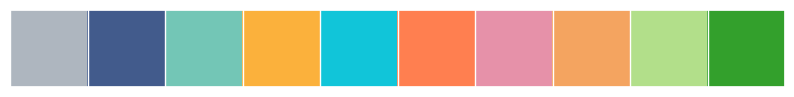

In [113]:
custom_palette = sns.color_palette(['#AEB6BF', '#425B8C', '#73C6B6', '#FBB13C', '#11C5D9', '#FF7F50', '#E691A9', '#F4A460', '#B2DF8A', '#33A02C'])
sns.palplot(custom_palette)


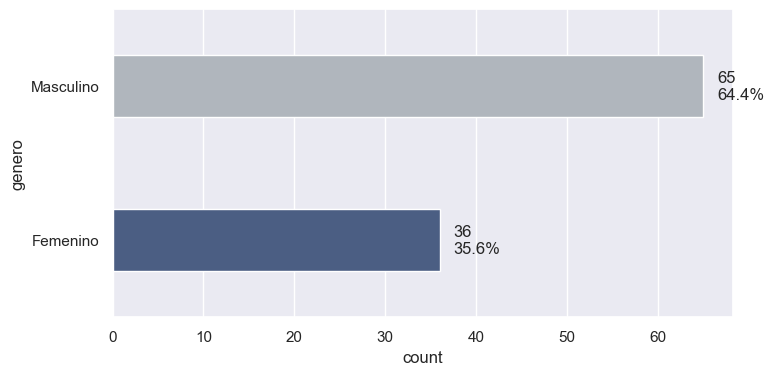

In [114]:
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Crear el countplot
ax = sns.countplot(data=data, y='genero', palette=custom_palette, width=0.4)
# Calcular el total de datos para calcular porcentajes
total_data = len(data)
# Agregar los valores y porcentajes en las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}\n{width/total_data*100:.1f}%',
                (width, p.get_y() + p.get_height() / 2.),
                va='center', ha='left',
                xytext=(10, 0),
                textcoords='offset points')

# plt.title('Género')
# Girar las etiquetas del eje y
plt.yticks(rotation=0)

plt.show()

La distribución por género tuvo los siguientes resultados: 36% corresponde al sexo femenino y 64% sexo masculino.

In [115]:
# crear conteo redes sociales 

# dividimos las categorías separadas por comas y expandimos en nuevas filas
df_social = data['4. red social confía más'].str.split(',').explode()
# Limpiamos los espacios adicionales antes y después del texto
df_social = df_social.str.strip()
#contamos las repeticiones de cada red social
social_counts = df_social.value_counts().reset_index()
# Se renombran las columnas para que el nuevo dataframe sea más descriptivo
social_counts.columns = ['red social', 'conteo']

print(social_counts)

          red social  conteo
0          Instagram      44
1           Facebook      33
2           WhatsApp      32
3            YouTube      25
4  Me es indiferente      18


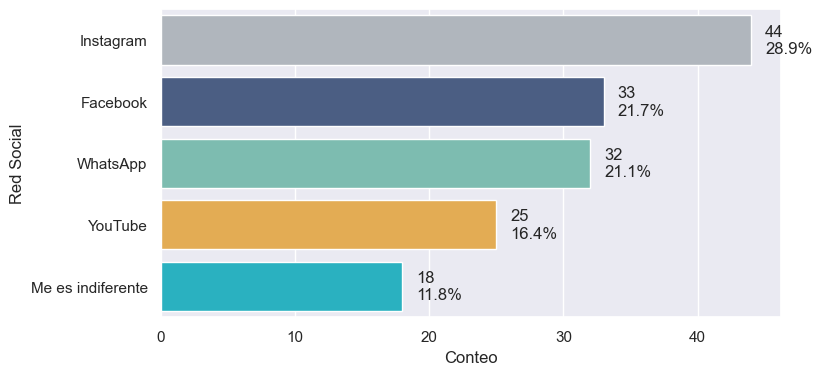

In [116]:
# Redes sociales
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Crear el barplot             
ax = sns.barplot(y='red social', x='conteo',  data=social_counts, palette=custom_palette)

# Calcular el total de datos para calcular porcentajes
total_data = social_counts['conteo'].sum()
# Agregar los valores y porcentajes en las barras
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_data) * 100
    ax.annotate(f'{int(width)}\n{percentage:.1f}%',
                (width, p.get_y() + p.get_height() / 2.),
                va='center', ha='left',
                xytext=(10, 0),
                textcoords='offset points')

# Agregar etiquetas y título
plt.xlabel('Conteo')
plt.ylabel('Red Social')
# plt.title('Confianza en Redes Sociales')

plt.show()


La variable relacionada con la confianza en redes sociales reveló que los participantes depositan una mayor confianza en la publicidad al considerar la adquisición de un producto educativo. En este sentido, Instagram encabeza la lista con un 28.9%, seguido por Facebook con un 21.7% y WhatsApp con un 21.1%.

El propósito de esta variable era optimizar la eficacia de la inversión en campañas de captación de clientes potenciales, destacando las redes sociales más adecuadas para esta actividad económica. Los resultados refuerzan la recomendación de enfocar esfuerzos en plataformas como Facebook e Instagram, lo cual está en línea con el análisis de redes sociales presentado en los capítulos anteriores.


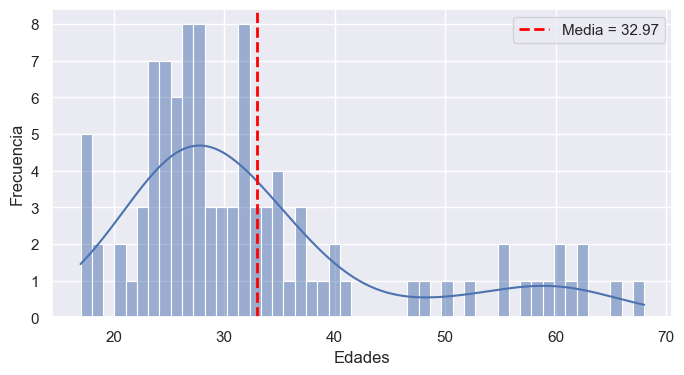

In [117]:
# histograma edad

plt.figure(figsize=(8, 4))
sns.histplot(data['edad'], bins=50, kde=True)

# Calcular la media de los datos
mean = np.mean(data['edad'])

# Agregar una línea vertical para mostrar la media
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media = {mean:.2f}')

# Agregar etiquetas y título al histograma
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
# plt.title('Distribución de Edades')

# Mostrar la leyenda
plt.legend()

plt.show()

El Gráfico Número # ilustra la distribución de edades en la muestra, revelando que los encuestados en el rango de 18 a 45 años representan la mayor proporción. Este hallazgo resulta clave para direccionar y segmentar estratégicamente las campañas publicitarias. En estas edades se concentra la audiencia objetivo, lo que enfatiza la importancia de focalizar los esfuerzos de marketing y promoción en este grupo demográfico específico.

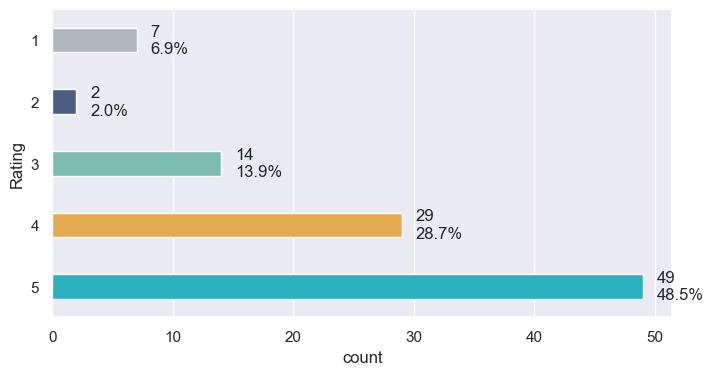

In [118]:
# 1.dispuesto a tomar cursos online

plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Crear el countplot
ax = sns.countplot(data=data, y='1.dispuesto a tomar cursos online', palette=custom_palette, width=0.4)
# Calcular el total de datos para calcular porcentajes
total_data = len(data)
# Agregar los valores y porcentajes en las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}\n{width/total_data*100:.1f}%',
                (width, p.get_y() + p.get_height() / 2.),
                va='center', ha='left',
                xytext=(10, 0),
                textcoords='offset points')

# plt.title('Disponibilidad a tomar cursos online')
# Girar las etiquetas del eje y
plt.ylabel('Rating')
plt.yticks(rotation=0)

plt.show()

El 48.5% de los participantes expresaron un fuerte interés en adquirir cursos en línea, otorgando la calificación máxima de 5. El 28% de los participantes otorgaron una puntuación de 4, lo que indica un interés significativo. El 13.9% asignó una calificación de 3, mostrando un nivel moderado de interés. Por último, el 8% de los participantes manifestaron un interés más bajo al otorgar calificaciones bajas.

In [119]:
# crear conteo areas del conocimiento interesado

# dividimos las categorías separadas por comas y expandimos en nuevas filas
df_areas_interes = data['2. areas del conocimiento interesado'].str.split(',').explode()

# Limpiamos los espacios adicionales antes y después del texto
df_areas_interes = df_areas_interes.str.strip()

#contamos las repeticiones de cada red social
areas_interes_count = df_areas_interes.value_counts().reset_index()

# Se renombran las columnas para que el nuevo dataframe sea más descriptivo
areas_interes_count.columns = ['Areas de interes', 'conteo']

print(areas_interes_count)

         Areas de interes  conteo
0                Finanzas      39
1  Administración pública      34
2    Contratación Estatal      32
3              Finca Raíz      31
4      Ciencias políticas      29
5                    Otro      29
6        Ciencia de datos      17


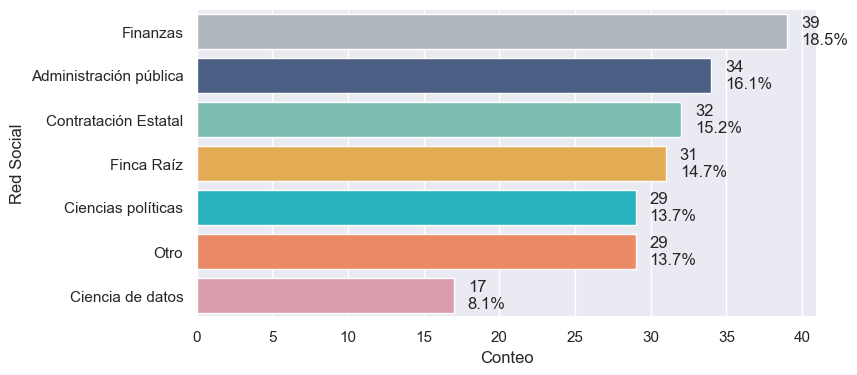

In [120]:
# Redes sociales
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Crear el barplot             
ax = sns.barplot(y='Areas de interes', x='conteo',  data= areas_interes_count, palette = custom_palette)

# Calcular el total de datos para calcular porcentajes
total_data = areas_interes_count['conteo'].sum()
# Agregar los valores y porcentajes en las barras
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_data) * 100
    ax.annotate(f'{int(width)}\n{percentage:.1f}%',
                (width, p.get_y() + p.get_height() / 2.),
                va='center', ha='left',
                xytext=(10, 0),
                textcoords='offset points')

# Agregar etiquetas y título
plt.xlabel('Conteo')
plt.ylabel('Red Social')
# plt.title('Areas del conocimiento')

plt.show()


## Mapa de palabras

In [121]:
import nltk
from nltk.corpus import stopwords

# Crear conteo de otras áreas de conocimiento interesado
df_otras_areas = data['3. otras areas del conocimiento'].str.split(' ').explode()
df_otras_areas = df_otras_areas.str.strip().str.lower()  # Elimina espacios al principio y convierte a minúsculas

# Conteo de otras áreas de conocimiento de interés
df_otras_areas_count = df_otras_areas.value_counts().reset_index()
df_otras_areas_count.columns = ['Otras Áreas de Interés', 'Conteo']

# Descargar stopwords en español si no lo has hecho
nltk.download('stopwords')

# Obtener la lista de stopwords en español
stop_words = set(stopwords.words('spanish'))
stop_words.update(['','áreas','si', 'tema', 'sector','moderna,', ",", 'armonia', "'titulos'",  'educación,',
                 'programa', 'humano', 'trabajo,', 'linkedin', '1', 'pagar'
                 'dificil', 'especifico', 'tema.', 'ejemplo,', "dispuesto"] )

# Función para eliminar stopwords
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])

# Aplicar la función para eliminar stopwords
df_otras_areas_count['Otras Áreas de Interés'] = df_otras_areas_count['Otras Áreas de Interés'].apply(lambda x: remove_stop(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


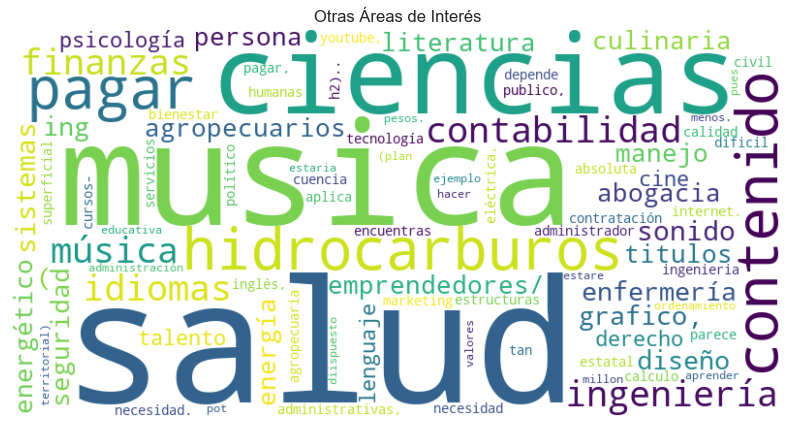

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_otras_areas_count.set_index('Otras Áreas de Interés')['Conteo'])

# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.title('Otras Áreas de Interés')
plt.show()

Se le solicito a los participantes que seleccionaran una o más áreas del conocimiento en el cual estuviesen interesados, de los cuales destacó finanzas con un %25.7 seguida de esta, administración pública con un %22.4 y contratación estatal con un %21.1, resaltando la importancia de promocionar mucho más el área del conocimiento en la cual se destaca el grupo EFPE, puesto que con este insight se revela que el contenido del grupo empresarial es atrayente, sin embargo, hace falta publicidad. Algo a destacar en este punto, se les dio la opción a los participantes que no estuviesen interesados en la selección preestablecida, en dar sugerencias, respecto a áreas del conocimiento de interés, los cuales contaron con el %19.1 de la población encuestada, destacando palabras como ciencia, música, salud, contabilidad, finanzas, idiomas e ingeniería, como se puede observar en el grafico # XXX, dado que finanzas también es relevante en este apartado y dada la flexibilidad que hay en el área del conocimiento idiomas la cual es transversal se sugiere una oportunidad valiosa para explorar e incursionar en estas áreas.

In [123]:
# Remplazar valores de pago maximo por mes 

data['5. pago máximo mes'] = data['5. pago máximo mes'].replace( {
    'Entre 100 y 200 mil pesos': '100K a 200K',
    'Entre 50 y 100 mil pesos': '50K a 100K',
    'Entre 300 y 400 mil pesos': '300K a 400K',
} )

# Remplazar valores de pago maximo por año

data['6. pago máximo año'] = data['6. pago máximo año'].replace({
    'Entre 500 Y 600': '500K  a 600K',
    'Entre 600 y 700': '600K  a 700K',
    'Entre 700 y 800': '700K  a 800K',
})

C:\Users\anton\AppData\Local\Temp\ipykernel_5084\4095580403.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


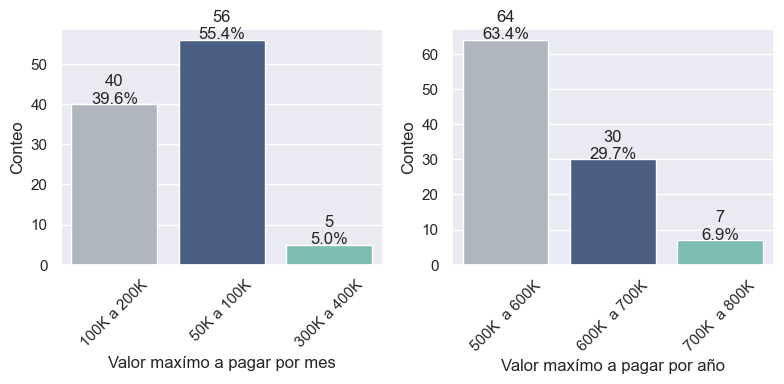

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el primer gráfico (subplot 1)
plt.figure(figsize=(8, 4))  # Tamaño de la figura

# Subplot 1
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
ax1 = sns.countplot(data=data, x='5. pago máximo mes', palette=custom_palette)
total_data = len(data)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}\n{height/total_data*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                va='center', ha='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Valor maxímo a pagar por mes')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.tight_layout()

# Crear el segundo gráfico (subplot 2)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
ax2 = sns.countplot(data=data, x='6. pago máximo año', palette=custom_palette)  # Cambia 'Otra columna' por la columna que desees
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}\n{height/total_data*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                va='center', ha='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Valor maxímo a pagar por año')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

El 55% de los encuestados indicó que estaría dispuesto a pagar, como máximo, en un intervalo mensual de $50,000 a $100,000. En segundo lugar, el 39.6% de los encuestados optó por el rango de $100,000 a $200,000. En cuanto a la suscripción anual, la mayoría de los participantes se ubicó en el intervalo de $500,000 a $600,000, seguido de cerca por aquellos en el rango de $600,000 a $700,000. Para garantizar una mayor asequibilidad y abarcar las preferencias de la mayoría de los presupuestos, se sugiere establecer la suscripción mensual en torno a los $100,000, mientras que la suscripción anual podría situarse en el intervalo de $600,000

## 7. interes en continuar en efpe

In [125]:
# mostrar valores de la variabel 
data['7. interes de contuniar efpe'].unique()

array([ 4., nan,  2.,  5.,  3.,  1.])

In [126]:
nonull_interes_efpe =  data['7. interes de contuniar efpe'].dropna() #eliminar valores nulos
print(nonull_interes_efpe.value_counts()) # mostrar el resultado

7. interes de contuniar efpe
5.0    35
4.0    23
3.0    15
2.0     6
1.0     5
Name: count, dtype: int64


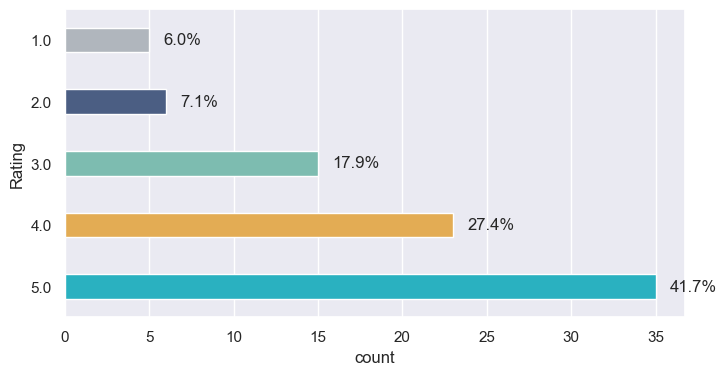

In [127]:
plt.figure(figsize=(8, 4)) 

# Crear el countplot
ax = sns.countplot(data=data, y= nonull_interes_efpe, palette=custom_palette, width=0.4)

# Calcular el total de datos para calcular porcentajes
total_data = len(nonull_interes_efpe)

# Agregar los porcentajes en las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width/total_data*100:.1f}%',
                (width, p.get_y() + p.get_height() / 2.),
                va='center', ha='left',
                xytext=(10, 0),
                textcoords='offset points')

# plt.title('Disponibilidad a continuar con EFPe')
plt.ylabel('Rating')
plt.yticks(rotation=0)

plt.show()

## Probabilidad de recomendación

In [129]:
# tomar los valores nan como no responde
data['8. probabilidad recomendacion'] = data['8. probabilidad recomendacion'].fillna('No responde')

# print resultado
print(data['8. probabilidad recomendacion'].unique())


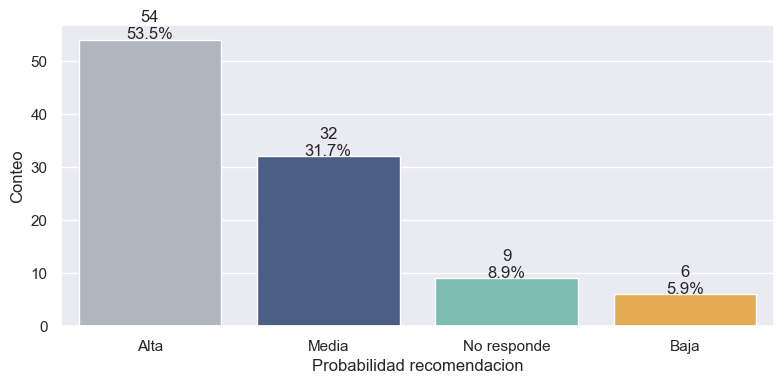

In [141]:
# Probabilidad de recomendación
plt.figure(figsize=(8, 4)) 
ax2 = sns.countplot(data=data, x='8. probabilidad recomendacion', palette=custom_palette) 

# Calcular el total de datos para calcular porcentajes
total_data = len(data['8. probabilidad recomendacion'])

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}\n{height/total_data*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                va='center', ha='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Probabilidad recomendacion')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

La mayoría de los encuestados expresan una fuerte disposición a recomendar la plataforma, lo que sugiere que una vez que estas recomendaciones se materialicen, se generará un flujo orgánico de nuevos clientes.

## analisis de la pregunta: que cambiaria a la plataforma

In [132]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Crear el DataFrame df_cabiar_platafomra con la columna 'que cambiaria a la plataforma'
df_cabiar_platafomra = data['que cambiaria a la plataforma'].str.split(' ').explode()
df_cabiar_platafomra = df_cabiar_platafomra.str.strip().str.lower()

# Conteo de otras áreas de conocimiento de interés
df_cabiar_platafomra_count = df_cabiar_platafomra.value_counts().reset_index()
df_cabiar_platafomra_count.columns = ['que cambiaria a la plataforma', 'Conteo']

# Descargar stopwords en español si no lo has hecho
nltk.download('stopwords')

# Obtener la lista de stopwords en español
stop_words = set(stopwords.words('spanish'))
stop_words.update([''
                   'tomado', 'conozco', 'curso', 'curso,','depende','educativa', 'aplica', 'on', 'clase', 'vayan',
                   'dar','realizado', 'cursos,', 'gustaría', 'line', 'entender', 'empresa', 'entidad'
                   ])

# Función para eliminar stopwords
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])

# Aplicar la función para eliminar stopwords
df_cabiar_platafomra_count['que cambiaria a la plataforma'] = df_cabiar_platafomra_count['que cambiaria a la plataforma'].apply(lambda x: remove_stop(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


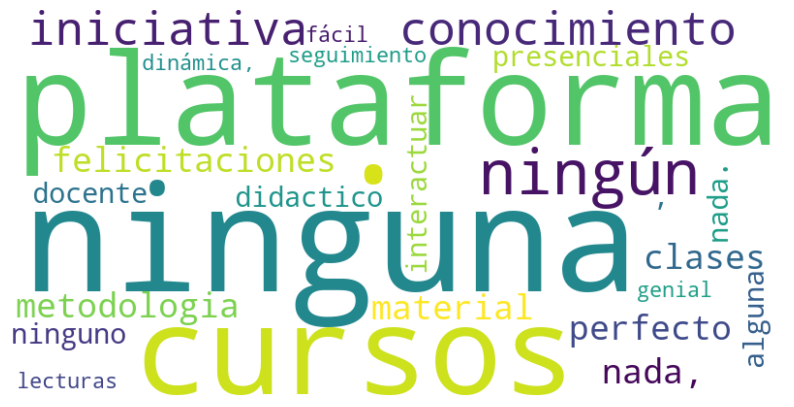

In [133]:
# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_cabiar_platafomra_count.set_index('que cambiaria a la plataforma')['Conteo'])

# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
# plt.title('Cosas a cambiar en la plataforma')
plt.show()

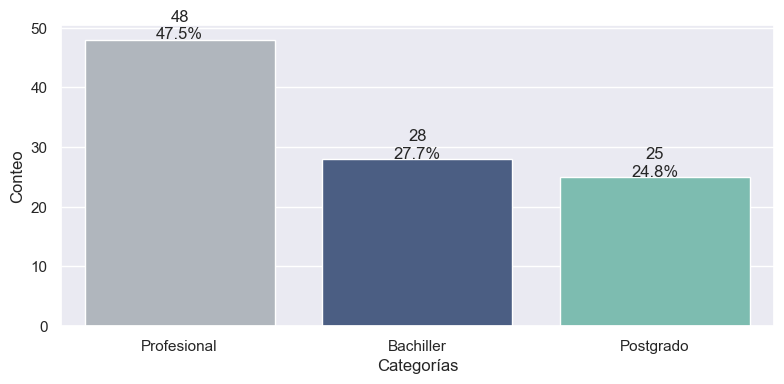

In [143]:
# Probabilidad recomendacion

plt.figure(figsize=(8, 4)) 
ax2 = sns.countplot(data=data, x='10. nivel educativo', palette=custom_palette)  # Cambia 'Otra columna' por la columna que desees

# Calcular el total de datos para calcular porcentajes
total_data = len(data['10. nivel educativo'])

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}\n{height/total_data*100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                va='center', ha='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Ciudades más destacadas

In [136]:
# agrar variable sin mayusculas

data['ciudad'] = data['ciudad'].str.lower().apply(unidecode)

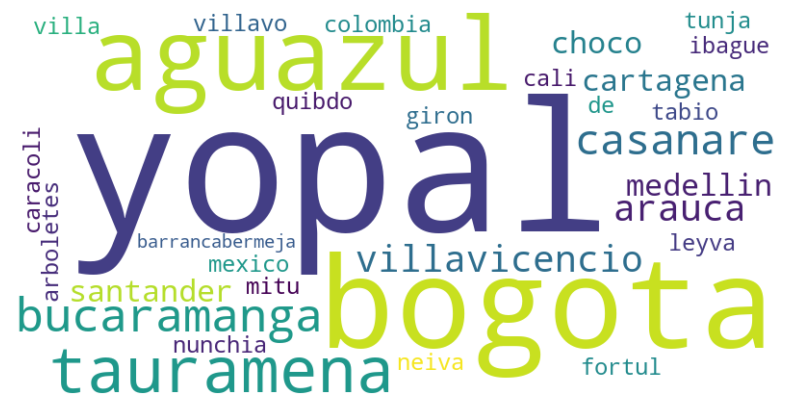

In [137]:
# Concatenar todas las ciudades en un solo string
ciudades_text = ' '.join(data['ciudad'])

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ciudades_text)

# Mostrar el WordCloud utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Una vez se eliminen ciudades que posiblemente den sesgos

In [138]:
# Descargar stopwords en español si no lo has hecho
nltk.download('stopwords')

# Obtener la lista de stopwords en español
stop_words = set(stopwords.words('spanish'))
stop_words.update(['', 'colombia', 'mexico', 'yopal', 'casanare', 'aguazul', 'tauramena'

                   ])

# Función para eliminar stopwords
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])

# Aplicar la función para eliminar stopwords
data['ciudad'] = data['ciudad'].apply(lambda x: remove_stop(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


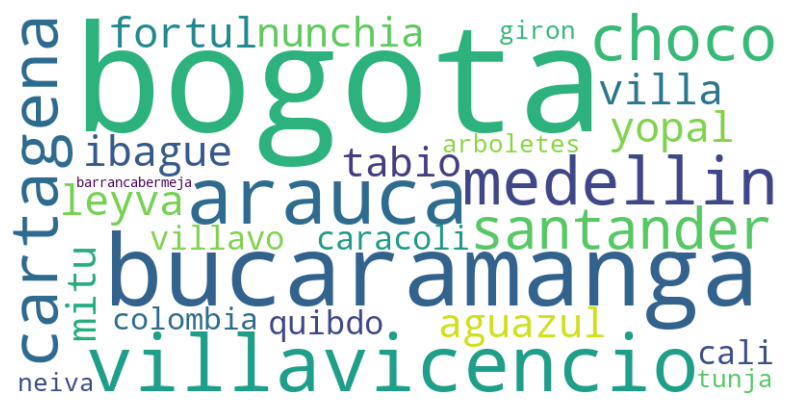

In [139]:
# Concatenar todas las ciudades en un solo string
ciudades = ' '.join(data['ciudad'])

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ciudades)

# Mostrar el WordCloud utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()